Importación de librerías necesarias 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect
from dotenv import load_dotenv
import os


Carga de credenciales para acceder a la base de datos

In [2]:
load_dotenv()

localhost = os.getenv('LOCALHOST')
port = os.getenv('PORT')
nameDB = os.getenv('DB_NAME')
userDB = os.getenv('DB_USER')
passDB = os.getenv('DB_PASS')

engine = create_engine(f'postgresql+psycopg2://{userDB}:{passDB}@{localhost}:{port}/{nameDB}')

inspector = inspect(engine)

#visualización inicial de análisis a los datos

In [12]:
dataframe = 'candidates'  

df = pd.read_sql_table(dataframe, engine)

print(df.head())
print(df.info())

   first_name  last_name                     email    applicant_date  country  \
0  First Name  Last Name                     Email  Application Date  Country   
1  Bernadette  Langworth       leonard91@yahoo.com        2021-02-26   Norway   
2      Camryn   Reynolds       zelda56@hotmail.com        2021-09-09   Panama   
3       Larue     Spinka  okey_schultz41@gmail.com        2020-04-14  Belarus   
4        Arch     Spinka    elvera_kulas@yahoo.com        2020-10-01  Eritrea   

  experience_year  seniority      technology  code_challenge_score  \
0             YOE  Seniority      Technology  Code Challenge Score   
1               2     Intern   Data Engineer                     3   
2              10     Intern   Data Engineer                     2   
3               4  Mid-Level  Client Success                    10   
4              25    Trainee       QA Manual                     7   

   technical_interview_score  
0  Technical Interview Score  
1                          3  

Borramos la primera fila ya que son las nombres de las columnas

In [13]:
df = df.drop(index=0)

df = df.reset_index(drop=True)

print(df.head())

   first_name   last_name                      email applicant_date  country  \
0  Bernadette   Langworth        leonard91@yahoo.com     2021-02-26   Norway   
1      Camryn    Reynolds        zelda56@hotmail.com     2021-09-09   Panama   
2       Larue      Spinka   okey_schultz41@gmail.com     2020-04-14  Belarus   
3        Arch      Spinka     elvera_kulas@yahoo.com     2020-10-01  Eritrea   
4       Larue  Altenwerth  minnie.gislason@gmail.com     2020-05-20  Myanmar   

  experience_year  seniority                         technology  \
0               2     Intern                      Data Engineer   
1              10     Intern                      Data Engineer   
2               4  Mid-Level                     Client Success   
3              25    Trainee                          QA Manual   
4              13  Mid-Level  Social Media Community Management   

  code_challenge_score technical_interview_score  
0                    3                         3  
1             

Miramos en la columna email por posibles datos duplicados, en caso de ser datos reales no debe de haber ningún correo duplicado, pero como estos son datos generados de forma aleatoria, se hace una excepción y se deja como esta.

In [14]:
columna = 'email'  

value_counts = df[columna].value_counts()

print(f"Frecuencia de valores en la columna '{columna}':")
print(value_counts)

Frecuencia de valores en la columna 'email':
email
fern70@gmail.com             3
marianne31@yahoo.com         3
charley51@gmail.com          2
brooks60@hotmail.com         2
rogers12@gmail.com           2
                            ..
diana70@gmail.com            1
marion91@hotmail.com         1
sister51@hotmail.com         1
marvin_parker@gmail.com      1
abigayle.crooks@yahoo.com    1
Name: count, Length: 49833, dtype: int64


Buscamos posibles outliers en la columna de años de experiencia 

In [15]:
exp = "experience_year"

expmax = df[exp].max()
expmin = df[exp].min()

print(f"Max {expmax} ")
print(f"Min {expmin} ")

Max 9 
Min 0 


Creamos una tabla donde muestre los empleados contratados

In [19]:
df['technical_interview_score'] = pd.to_numeric(df['technical_interview_score'], errors='coerce')
df['code_challenge_score'] = pd.to_numeric(df['code_challenge_score'], errors='coerce')

# Crear la columna 'hired' en base a las condiciones especificadas
df['hired'] = df.apply(lambda row: 1 if row['technical_interview_score'] >= 7 and row['code_challenge_score'] >= 7 else 0, axis=1)

print(df.head())

   first_name   last_name                      email applicant_date  country  \
0  Bernadette   Langworth        leonard91@yahoo.com     2021-02-26   Norway   
1      Camryn    Reynolds        zelda56@hotmail.com     2021-09-09   Panama   
2       Larue      Spinka   okey_schultz41@gmail.com     2020-04-14  Belarus   
3        Arch      Spinka     elvera_kulas@yahoo.com     2020-10-01  Eritrea   
4       Larue  Altenwerth  minnie.gislason@gmail.com     2020-05-20  Myanmar   

  experience_year  seniority                         technology  \
0               2     Intern                      Data Engineer   
1              10     Intern                      Data Engineer   
2               4  Mid-Level                     Client Success   
3              25    Trainee                          QA Manual   
4              13  Mid-Level  Social Media Community Management   

   code_challenge_score  technical_interview_score  hired  
0                     3                          3      

Ahora volvemos a cargar los datos ya arreglados en la base de datos

In [22]:
try:
    df.to_sql('candidates', engine, if_exists='replace', index=False)

    print(f"Tabla 'candidates' se actualizó.")

except Exception as e:
    print(f"Error al subir los datos: {e}")

finally:
    engine.dispose()

Tabla 'candidates' se actualizó.


Grafico de los empleados contratados y rechazados

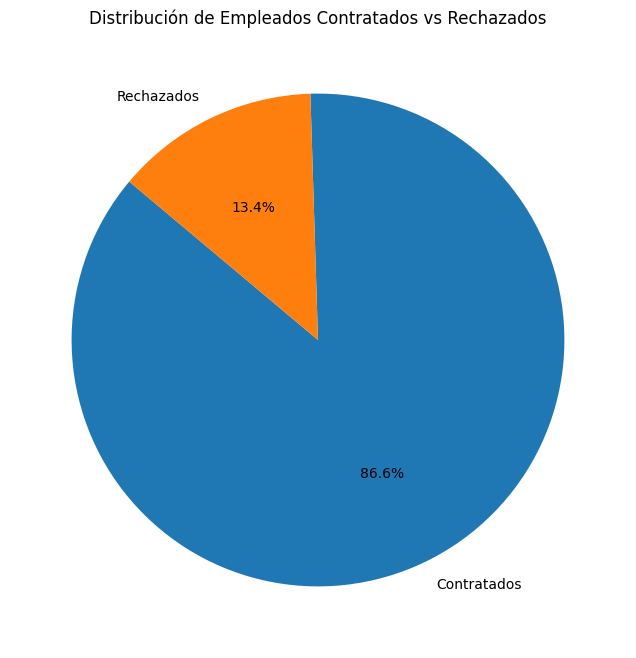

In [28]:
hire = df['hired'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(hire, labels=['Contratados', 'Rechazados'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Empleados Contratados vs Rechazados')
plt.show()

Tecnologia que manejan los empleados contratados

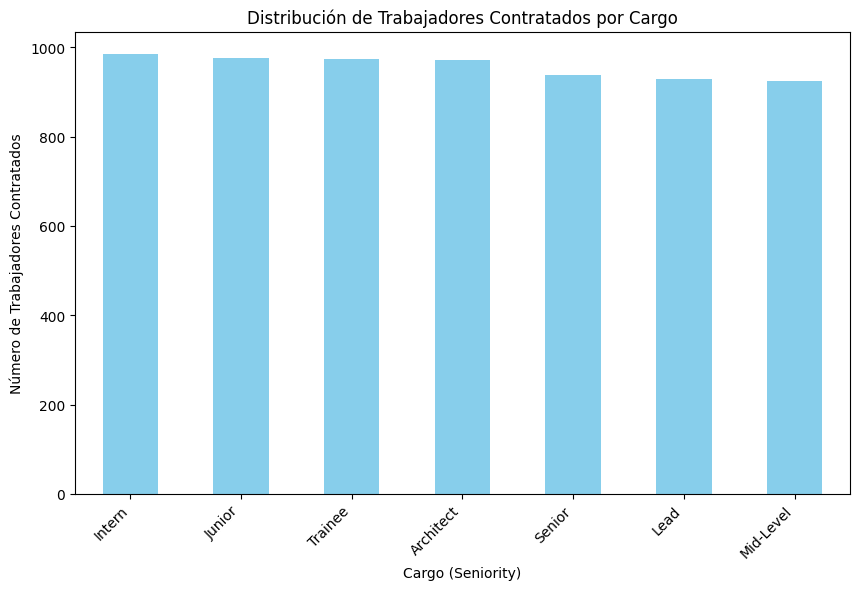

In [35]:
df_hired = df[df['hired'] == 1]

seniority_counts = df_hired['seniority'].value_counts()

seniority_counts = seniority_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
seniority_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Trabajadores Contratados por Cargo')
plt.xlabel('Cargo (Seniority)')
plt.ylabel('Número de Trabajadores Contratados')
plt.xticks(rotation=45, ha='right')
plt.show()